# Lab 04: Aliasing of digital sampling

In [56]:
import sys
sys.path.append('../ThinkDsp')
import thinkdsp
import thinkplot

## Aliasing: Trianglar sound wave

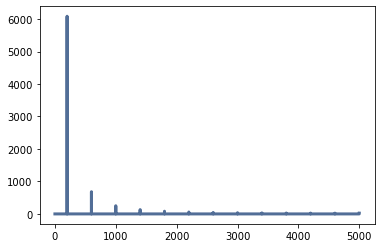

In [57]:
frequency = 200
framerate = 10000

triangle_sig = thinkdsp.TriangleSignal(freq=frequency, amp=1, offset=0)
triangle_wave = triangle_sig.make_wave(duration=1.5, start=0, framerate=framerate)
sp = triangle_wave.make_spectrum()
sp.plot()

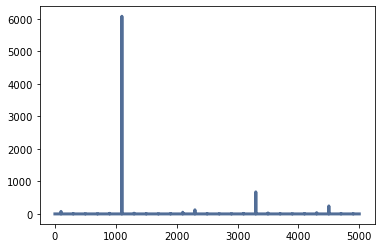

In [58]:
frequency = 1100
framerate = 10000

triangle_sig = thinkdsp.TriangleSignal(freq=frequency, amp=1, offset=0)
triangle_wave = triangle_sig.make_wave(duration=1.5, start=0, framerate=framerate)
sp = triangle_wave.make_spectrum()
sp.plot()

## Nyquist’s Theorem

A frequency which is greater than half the sample frequency gets reflected through half the sample frequency, so that it sounds like a frequency of the corresponding amount less than half.

<img src="aliasing.png">

## Aliasing: a single cosine sound wave

In [59]:
frequency = 1500
framerate = 5000

cos_signal = thinkdsp.CosSignal(frequency)
cos_wave = cos_signal.make_wave(duration=1.5, framerate=framerate)
cos_wave.make_audio()

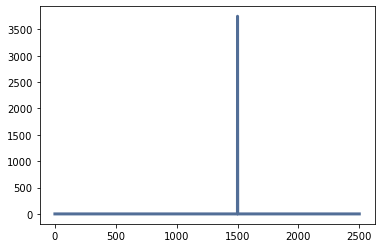

In [60]:
sp = cos_wave.make_spectrum()
sp.plot()

In [61]:
frequency = 3500
framerate = 5000

cos_signal = thinkdsp.CosSignal(frequency)
cos_wave = cos_signal.make_wave(duration=1.5, framerate=framerate)
cos_wave.make_audio()

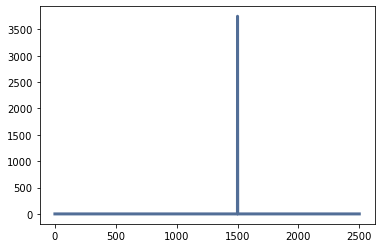

In [62]:
sp = cos_wave.make_spectrum()
sp.plot()

In [63]:
frequency = 3500
framerate = 10000

cos_signal = thinkdsp.CosSignal(frequency)
cos_wave = cos_signal.make_wave(duration=1.5, framerate=framerate)
cos_wave.make_audio()

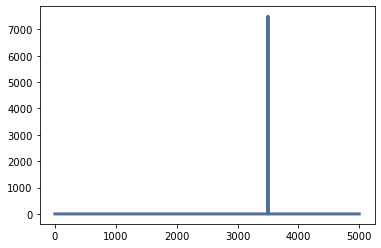

In [64]:
sp = cos_wave.make_spectrum()
sp.plot()

## Aliasing: Chirp

In [65]:
def half_framerate(w):
    fr = w.framerate/2
    l = round(len(w.ys)/2)
    ys = [0.0]*l
    ts = [0.0]*l
    for i in range(l):
        ys[i] = w.ys[i*2]
        ts[i] = w.ts[i*2]
    w2 = thinkdsp.Wave(ys,ts,fr)
    return(w2)

In [66]:
signal = thinkdsp.Chirp(start=2000, end=3000)
wave = signal.make_wave(duration=3, framerate=10000)
wave.make_audio()

In [67]:
wave_half = half_framerate(wave)
wave_half.make_audio()

In [68]:
print(wave_half.framerate)

5000.0


## Aliasing: wave file

### Read wave file

In [69]:
wave = thinkdsp.read_wave("triangle_mod_200Hz.wav")
wave.make_audio()

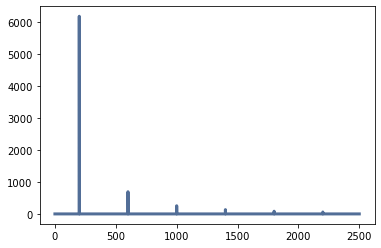

In [76]:
sp = wave.make_spectrum()
sp.plot(high=2500)

Note that the components of frequencies higher than 3000 have been removed.

In [71]:
print(wave.framerate)

10000


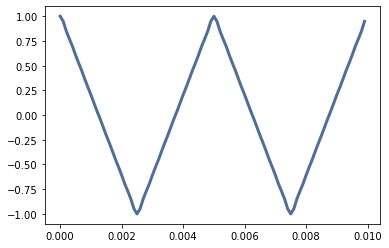

In [72]:
seg = wave.segment(0,0.01)
seg.plot()

### Reduce framerate

In [73]:
wave_half = half_framerate(wave)
wave_half.make_audio()

In [74]:
print(wave_half.framerate)

5000.0


### Note the aliasing

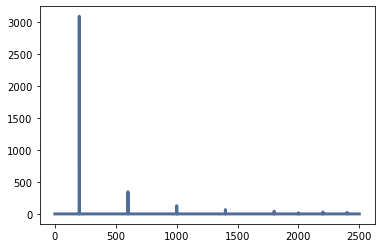

In [75]:
sp_half = wave_half.make_spectrum()
sp_half.plot(high=2500)